In [1]:
import os
import time
# import flopy
import numpy as np
# import torch
# import pandas as pd
# import gstools as gs
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# from multiprocessing import Pool
from sklearn.metrics import r2_score

from methods.ES import es
from methods.ILUES import ilues
from methods.MCMCmodel import metropolis_hastings
from sko.GA import GA

from models.modflow_model import forwardmodel as forwardmodel_true
from models.surrogate_model import forwardmodel
# from models.DNN_surrogate_model import forwardmodel
from utils.utils import genex

config = {'font.family': 'Times New Roman',
          'font.size': 13,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
          'savefig.dpi': 300
         }
plt.rcParams.update(config)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# torch.multiprocessing.set_start_method('spawn')

np.set_printoptions(suppress=True)

parameter_number = 34

nx, ny, mean_logk, lamda_xy, fn_x, fn_y, kesi_real = np.load('./data/KLE{}.npy'.format(parameter_number), allow_pickle=True)

obs = forwardmodel_true(kesi_real)

/public/home/wangzitao/miniconda3/envs/work/lib/python3.10/site-packages/pyDOE2/doe_factorial.py:16: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp
/public/home/wangzitao/miniconda3/envs/work/lib/python3.10/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


In [2]:
obs

array([2675.38772669, 2674.58586025, 2673.92749941, 2673.80728694,
       2673.3582601 , 2673.5213611 , 2673.02607797, 2673.37138669,
       2672.84622502, 2673.18443293, 2672.51198047, 2672.82890713,
       2672.40837492, 2673.40647514, 2673.43467934, 2677.74829446,
       2677.8449859 , 2677.5935214 , 2676.68400206, 2675.15654395,
       2678.73665166, 2678.48619471, 2677.30156165, 2673.58620913,
       2677.30828144, 2678.39704291, 2671.31242421, 2675.19667427,
       2677.40034224, 2674.24132182, 2676.37301264, 2674.95011613,
       2673.29221144, 2673.12528207, 2671.6794051 , 2673.03047742])

In [ ]:
# indices = indices = np.array([45, 43, 40, 37, 46, 33, 31, 39, 42, 34, 36, 27, 28, 30, 19, 25, 10,
#         15, 16, 22, 13, 18,  4,  3, 21, 24,  7,  6,  9, 12,  1,  0, 47, 41,
#         44, 35, 38, 29, 32, 26, 20, 17, 23,  8,  5, 11, 14,  2])

# indices = indices[:parameter_number]

# kesi_real_30 = np.random.uniform(low=-2.5, high=2.5, size=parameter_number)
# kesi_real = kesi_real.reshape(-1)
# for i in indices:
    # kesi_real_30[i] = kesi_real[i]

# real = [np.nan] * parameter_number
# for j in range(parameter_number):
    # real[j] = kesi_real[indices[j]]

# real = np.array(real)

# plt.figure(figsize=(6, 4))
# plt.subplot(221)
# plt.plot(kesi_real.reshape(-1))
# plt.subplot(222)
# plt.plot(obs)
# plt.subplot(223)
# # 任意随机数输入时的比较
# obsfake = forwardmodel(kesi_real_30) #  np.random.randn(parameter_number))
# # x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())
# plt.scatter(obs, obsfake, s=5)

# print("输入任意随机数时 R2: ", r2_score(obsfake, obs))

输入任意随机数时 R2:  0.9814489897464275


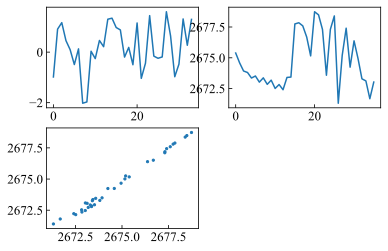

In [2]:
plt.figure(figsize=(6, 4))
plt.subplot(221)
plt.plot(kesi_real.reshape(-1))
plt.subplot(222)
plt.plot(obs)
plt.subplot(223)
# 任意随机数输入时的比较
obsfake = forwardmodel(kesi_real) #  np.random.randn(parameter_number))
plt.scatter(obs, obsfake, s=5)

print("输入任意随机数时 R2: ", r2_score(obs[:], obsfake[:]))

In [4]:
(kesi_real.min(), kesi_real.max())

(-2.0230400808579607, 1.5996952280370067)

# ES & ILUES

In [12]:
N1 = 20000 # 采样数, 莫低于 20 否则易报错
Npar = parameter_number # 未知参数数量
range_ = np.tile(np.array([-2.5, 2.5]), (Npar, 1))

Nobs = obs.shape[0]
# obs = [8.47, ]
sd = np.array([0.01, ])
x1 = genex(range_, N1)
y1 = np.empty((Nobs, N1))
y1[:] = np.nan
for i in range(N1):
    y1[:,i] = 1666

q = 10 # 迭代次数

start_time = time.time()
X, Y = es(x1, y1, obs, sd, q, range_, forwardmodel)
# X, Y = ilues(x1, y1, obs, sd, q, range_, forwardmodel, alpha=0.1)
end_time = time.time()
print(f"Elapsed time: {((end_time - start_time)/60):.3f} min")

当前第 0 次迭代
当前第 1 次迭代
当前第 2 次迭代
当前第 3 次迭代
当前第 4 次迭代
当前第 5 次迭代
当前第 6 次迭代
当前第 7 次迭代
当前第 8 次迭代
当前第 9 次迭代
Elapsed time: 1.189 min


In [8]:
real[:], ES_mean

(array([-0.98335124,  0.91178966,  1.16813814,  0.45637558,  0.09738635,
        -0.49153527,  0.12930581, -2.02304008, -1.97253238,  0.0355577 ,
        -0.25578848,  0.46206778,  0.21601572,  1.3042008 ,  1.34579188,
         0.97573824,  0.88057423, -0.19495903,  0.18768442, -0.49742327,
         1.15384367, -1.03706619, -0.43852673,  1.44600226, -0.15753793,
        -0.24283745, -0.18996387,  1.59969523,  0.64235502, -0.97305024,
        -0.47505204,  1.31421505,  0.27342882,  1.29805817]),
 array([ 0.54267328,  0.66974235,  0.89546207,  0.2245534 ,  0.08774859,
         0.30810407, -0.80789641, -0.9448785 , -2.08991055,  0.04154551,
        -0.36394351,  0.58036753,  0.40398322,  1.19091128,  1.71446025,
         1.16113149,  0.96717508, -1.0306949 , -0.17519522,  0.21880092,
         1.15336798, -0.73943212, -0.34571226,  1.70048498,  0.31991572,
        -0.04913315, -0.33066122,  1.07530164,  0.2745059 , -1.15436478,
        -0.95628187,  0.82402227,  1.35183895,  1.700857  ]))

参数 R2:  0.671091008441068
结果 R2:  0.9999006731877828


array([ 0.42984005,  0.63787829,  1.0156999 ,  0.12945908,  0.08517267,
        0.29979019, -0.86245646, -0.94696309, -2.4256744 ,  0.08458931,
       -0.53108903,  0.55789612,  0.29566519,  1.35520402,  1.93714881,
        1.1148541 ,  0.85657078, -1.1924809 , -0.22451963,  0.25826674,
        1.13304363, -0.88511175, -0.3029888 ,  1.73951588,  0.15834182,
        0.01424221, -0.35378266,  1.12012308,  0.12971245, -1.09268435,
       -1.23266001,  0.70731824,  1.42135345,  1.74524786])

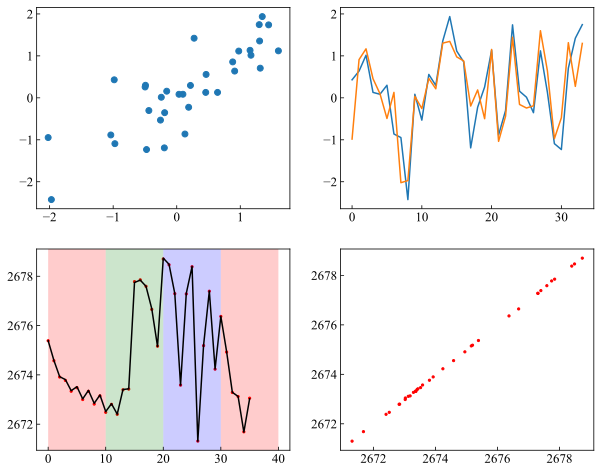

In [13]:
real = kesi_real.reshape(-1)
ES_mean = X[:, -N1:].mean(axis=1)
Y_mean = forwardmodel(ES_mean)

#################################

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(real[:], ES_mean)

plt.subplot(2, 2, 2)
plt.plot(ES_mean)
plt.plot(real)

plt.subplot(2, 2, 3)
plt.scatter(np.arange(obs.shape[0]), Y_mean, s=5, c="red")
plt.plot(np.arange(obs.shape[0]), obs, c="black")
colors = ['red', 'green', 'blue']
for i in range(0, obs.shape[0], 10):
    plt.axvspan(i, i+10, facecolor=colors[i//10 % len(colors)], alpha=0.2)

plt.subplot(2, 2, 4)
# sns.kdeplot(X[:, -1], c="red")
# sns.kdeplot(real, c="green")
plt.scatter(obs, Y[:, -1], s=5, c="red")

print("参数 R2: ", r2_score(ES_mean, real))
print("结果 R2: ", r2_score(obs, Y_mean))
ES_mean

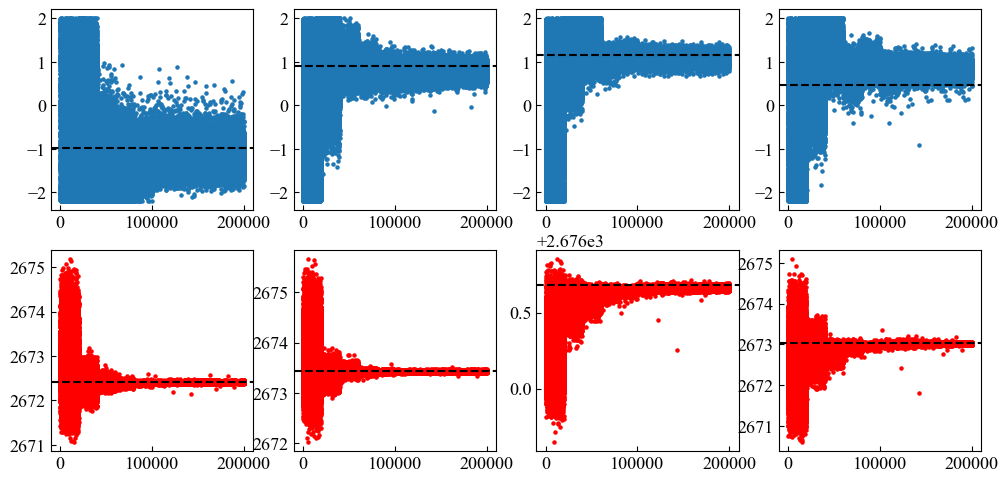

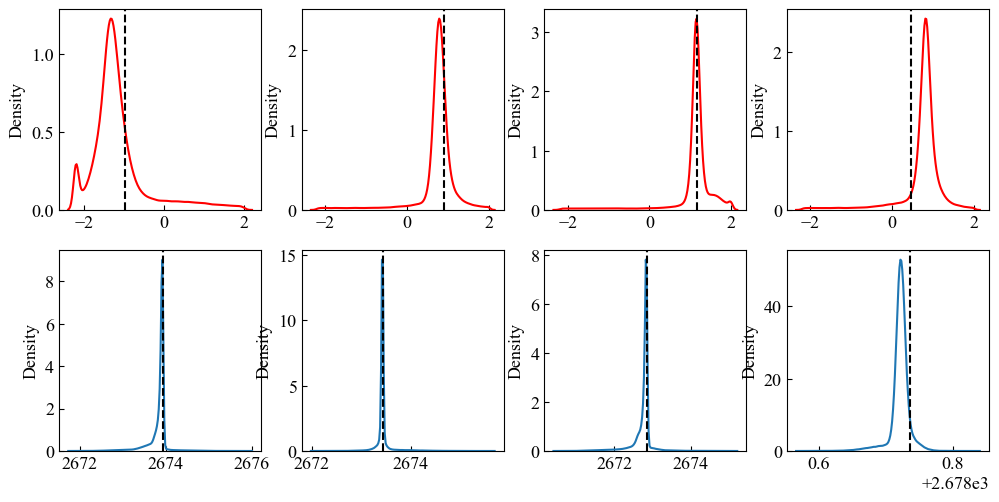

In [16]:
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(4, 4, i+1)
    plt.scatter(np.arange(X[i, N1:].shape[0]), X[i, N1:], s=5)
    plt.axhline(y=real[i], color='black', linestyle='--')
for j in range(4):
    num = np.random.randint(1, 20)
    plt.subplot(4, 4, j+5)
    plt.scatter(np.arange(Y[j+num, N1:].shape[0]), Y[j+num, N1:], s=5, color="red")
    plt.axhline(y=obs[j+num], color='black', linestyle='--')

plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(X[i, N1:], c="red")
    plt.axvline(x=real[i], color='black', linestyle='--')

for j in range(4):
    num = np.random.randint(1, 20)
    plt.subplot(4, 4, j+5)
    sns.kdeplot(Y[j+num, N1:])
    plt.axvline(x=obs[j+num], color='black', linestyle='--')


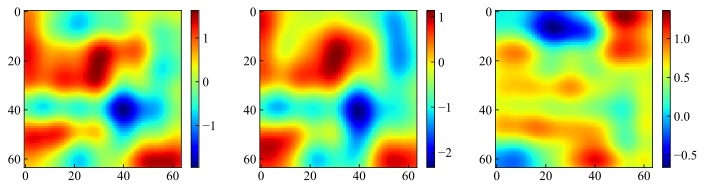

In [14]:
def calculate_logk(nx, ny, mean_logk, lamda_xy, fn_x, fn_y, kesi):
    
    kesi = kesi.reshape(1, -1) # 增维, 必须
    logk = np.zeros((nx, ny))
    # 由随机数计算渗透率场
    for i_x in range(nx):
        for i_y in range(ny):
            logk[i_y, i_x] = mean_logk + np.sum(np.sqrt(lamda_xy) * fn_x[i_x][0] * \
                                    fn_y[i_y][0] * kesi.transpose())
    return logk

suijishu = X[:, -1]

logk11 = calculate_logk(nx, ny, mean_logk, lamda_xy, fn_x, fn_y, suijishu)

logk11_real = calculate_logk(nx, ny, mean_logk, lamda_xy, fn_x, fn_y, kesi_real)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(logk11, cmap="jet")
plt.colorbar(shrink=0.71)
ax = fig.add_subplot(1, 3, 2)
plt.imshow(logk11_real, cmap="jet")
plt.colorbar(shrink=0.71)
ax = fig.add_subplot(1, 3, 3)
plt.imshow(logk11 - logk11_real, cmap="jet")
plt.colorbar(shrink=0.71)

# GA

In [ ]:
def func(x):
    y = forwardmodel(x)
    result = 1 - r2_score(y, obs)
    return result

ga = GA(func=func,
        n_dim=parameter_number,
        size_pop=800,
        max_iter=1000,
        lb=np.ones(parameter_number) * (-2.5),
        ub=np.ones(parameter_number) * 2.5
       )

start_time = time.time()
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)
end_time = time.time()
print(f"Elapsed time: {((end_time - start_time)/60):.3f} min")

In [ ]:
plt.scatter(kesi_real, best_x)
r2_score(best_x.reshape(-1), kesi_real.reshape(-1))

In [ ]:
plt.scatter(obs, forwardmodel(best_x))
r2_score(obs, forwardmodel(best_x))

In [ ]:
def calculate_logk(nx, ny, mean_logk, lamda_xy, fn_x, fn_y, kesi):
    
    kesi = kesi.reshape(1, -1) # 增维, 必须
    logk = np.zeros((nx, ny))
    # 由随机数计算渗透率场
    for i_x in range(nx):
        for i_y in range(ny):
            logk[i_y, i_x] = mean_logk + np.sum(np.sqrt(lamda_xy) * fn_x[i_x][0] * \
                                    fn_y[i_y][0] * kesi.transpose())
    return logk

suijishu = best_x

logk11 = calculate_logk(nx, ny, mean_logk, lamda_xy, fn_x, fn_y, suijishu)

logk11_real = calculate_logk(nx, ny, mean_logk, lamda_xy, fn_x, fn_y, kesi_real)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(logk11, cmap="jet")
plt.colorbar()
ax = fig.add_subplot(1, 3, 2)
plt.imshow(logk11_real, cmap="jet")
plt.colorbar()
ax = fig.add_subplot(1, 3, 3)
plt.imshow(logk11 - logk11_real, cmap="jet")
plt.colorbar(shrink=0.73)

# MCMC

In [ ]:
N1 = 1 # 采样数, 莫低于 20 否则易报错
Npar = parameter_number # 未知参数数量
range_ = np.tile(np.array([-2.5, 2.5]), (Npar, 1))

sd = np.ones(parameter_number) * 0.01
x1 = genex(range_, N1).reshape(-1)

q = 80000 # 迭代次数

start_time = time.time()
accepted, rejected, scores = metropolis_hastings(x1, obs, sd, q, range_, forwardmodel)
end_time = time.time()
print(f"Elapsed time: {((end_time - start_time)/60):.3f} min")
print("接受了 {} 个样品".format(accepted.shape[0]))

MCMC_mean = accepted[-1000:, :].mean(axis=0)

In [ ]:
Y = forwardmodel(accepted[-1000:, :].mean(axis=0))
r2_score(obs, Y)

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(scores)
plt.subplot(122)
plt.scatter(MCMC_mean, kesi_real[0, :])
print("参数 R2: ", r2_score(accepted[-1000:, :].mean(axis=0).reshape(-1), kesi_real.reshape(-1)))

In [ ]:
accepted[-1000:, :].mean(axis=0)

In [ ]:
def calculate_logk(nx, ny, mean_logk, lamda_xy, fn_x, fn_y, kesi):
    
    kesi = kesi.reshape(1, -1) # 增维, 必须
    logk = np.zeros((nx, ny))
    # 由随机数计算渗透率场
    for i_x in range(nx):
        for i_y in range(ny):
            logk[i_y, i_x] = mean_logk + np.sum(np.sqrt(lamda_xy) * fn_x[i_x][0] * \
                                    fn_y[i_y][0] * kesi.transpose())
    return logk

# suijishu = X[:, -1]
suijishu = accepted[-1, :]

logk11 = calculate_logk(nx, ny, mean_logk, lamda_xy, fn_x, fn_y, suijishu)

logk11_real = calculate_logk(nx, ny, mean_logk, lamda_xy, fn_x, fn_y, kesi_real)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(logk11, cmap="jet")
plt.colorbar()
ax = fig.add_subplot(1, 3, 2)
plt.imshow(logk11_real, cmap="jet")
plt.colorbar()
ax = fig.add_subplot(1, 3, 3)
plt.imshow(logk11 - logk11_real, cmap="jet")
plt.colorbar()

# ESMDA

In [ ]:
# from pyesmda import ESMDA, ESMDA_RS
# # seed for the reproductibility
# seed = 10
# rng = np.random.default_rng(seed=seed)

# obs = obs + rng.normal(0.0, 0.1, 360)
# # Observation error covariance matrix
# cov_obs = np.diag([0.1] * obs.shape[0])

# n_ensemble = 700  # size of the ensemble 采样数

# range_ = np.tile(np.array([-2.5, 2.5]), (71, 1))
# x1 = genex(range_, n_ensemble).T
# m_ensemble = x1

# # Bounds on parameters (size m * 2)
# m_bounds = range_

# # Number of assimilations
# n_assimilations = 3

# # Use a geometric suite (see procedure un evensen 2018) to compte alphas.
# # Also explained in Torrado 2021 (see her PhD manuscript.)
# cov_obs_inflation_geo = 1.2
# cov_obs_inflation_factors: list[float] = [1.1]
# for l in range(1, n_assimilations):
#     cov_obs_inflation_factors.append(
#         cov_obs_inflation_factors[l - 1] / cov_obs_inflation_geo
#     )
# scaling_factor: float = np.sum(1 / np.array(cov_obs_inflation_factors))
# cov_obs_inflation_factors = [
#     alpha * scaling_factor for alpha in cov_obs_inflation_factors
# ]

# np.testing.assert_almost_equal(sum(1.0 / np.array(cov_obs_inflation_factors)), 1.0)

# # This is just for the test
# cov_mm_inflation_factors: list[float] = [1.2] * n_assimilations

# # print(m_ensemble.shape)
# x = m_ensemble
# def total_forwardmodel(x):
#     y = np.zeros([700, 360])
#     # print(x.size)
#     for i in range(x.shape[0]):
#         y[i, :] = forwardmodel(x[i, :])
#     return y

# solver = ESMDA(
#     obs,
#     m_ensemble,
#     cov_obs,
#     total_forwardmodel,
#     forward_model_args=(),
#     forward_model_kwargs={},
#     n_assimilations=n_assimilations,
#     cov_obs_inflation_factors=cov_obs_inflation_factors,
#     cov_mm_inflation_factors=cov_mm_inflation_factors,
#     m_bounds=m_bounds,
#     save_ensembles_history=True,
#     seed=seed
# )
# # Call the ES-MDA solver
# solver.solve()

# plt.scatter(solver.m_prior.mean(axis=0), kesi_real)
# canshu_esmda=np.array(solver.m_history)
# canshu_esmda[2,].mean(axis=0)

# canshu_esmda=np.array(solver.m_history)

# plt.scatter(canshu_esmda[3, -1], kesi_real)